## Evolution Strategies

![img](https://t4.ftcdn.net/jpg/00/17/46/81/240_F_17468143_wY3hsHyfNYoMdG9BlC56HI4JA7pNu63h.jpg)

[The paper about the algorithm](https://arxiv.org/abs/1703.03864)

Plan:
* Study how to use OpenAI gym
* Basic prototype of evolutionary strategies that works in one thread on CartPole
* Modify the code to make them work in parallel
* Use the algorithm to solve the LunarLander
* Analyse the influence of hyperparameters

In [1]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash

    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import time
from copy import deepcopy
from joblib import Parallel, delayed
from IPython.display import clear_output
from IPython import display
 
%matplotlib inline

# OpenAI gym environment

Observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Action space: Discrete(2)


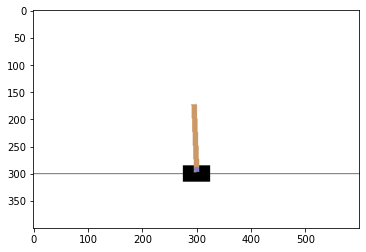

In [3]:
import gym

tmp_env = gym.make("CartPole-v0")
tmp_env.reset()

plt.imshow(tmp_env.render('rgb_array'))
print("Observation space:", tmp_env.observation_space)
print("Action space:", tmp_env.action_space)
state_size = tmp_env.observation_space.shape[0]
n_actions = tmp_env.action_space.n

### How to interact with the environment

In [4]:
print("Initial observation:", tmp_env.reset())

new_s, reward, done, _ = tmp_env.step(0)
print("At each step it returns:")

print("new observation code:", new_s)
print("reward:", reward)
print("is game over?:", done)

Initial observation: [-0.0441675   0.0355158  -0.03658269 -0.02903847]
At each step it returns:
new observation code: [-0.04345718 -0.15906295 -0.03716346  0.25188148]
reward: 1.0
is game over?: False


### Display an episode

In [5]:
def display_session(env, agent, t_max=500):
    total_reward = 0
    plt.figure(figsize=(4, 3))
    display.clear_output(wait=True)

    s = env.reset()
    
    for t in range(t_max):
        plt.gca().clear()
        
        a = agent.get_action(torch.tensor(s).float())
        new_s, r, done, info = env.step(a)
        s = new_s
        total_reward += r
        # Draw game image on display.
        plt.imshow(env.render('rgb_array'))

        display.display(plt.gcf())
        display.clear_output(wait=True)
        
        if done:
            break
            
    return total_reward

### Random policy

In [6]:
class RandomPolicy:
    pass

Total reward:  16.0


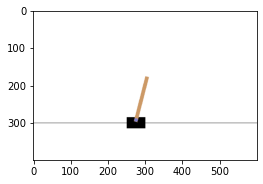

In [7]:
total_reward = display_session(tmp_env, RandomPolicy(n_actions))
print('Total reward: ', total_reward)

# The challenge of the day

![Algorithm](https://i.ibb.co/zFm6BrB/Screenshot-from-2021-09-17-13-38-00.png)

### Model evaluation

In [8]:
def generate_session(env, agent, t_max=500):
    total_reward = 0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.get_action(torch.tensor(s).float())
        new_s, r, done, info = env.step(a)
        total_reward += r
        s = new_s
        
        if done:
            break
            
    return total_reward


def score(env, agent, n=10, t_max=500):
    pass

### Modification of the model using a noise 

In [9]:
def add_noise_to_model(model, noise, copy=False):
    pass

### Controller of the evolution

#### Task 1: Implement the algorithm

In [10]:
class EvolutionManager:
    def __init__(self, get_env_function, lr=0.001, std=0.01, n_samples = 64, normalize=True):
        super().__init__()
        
        self.lr = lr
        self.std = std
        self.normalize = normalize
        self.n_samples = n_samples
        self.mean_reward_history = []
        
        self.env = get_env_function()
        
    def get_noised_model(self, model):
        pass

    def optimize(self, model, noises, rewards):
        pass
    
    def step(self, model):
        pass
        
    def update_log(self, rewards):
        mean_reward = np.mean(rewards)
        self.mean_reward_history.append(mean_reward)

        clear_output(True)
        print("last mean reward = %.3f" % mean_reward)
        plt.figure(figsize=[8, 4])
        plt.subplot(1, 2, 1)
        plt.plot(self.mean_reward_history, label='Mean rewards')
        plt.legend()
        plt.grid()

        plt.subplot(1, 2, 2)
        plt.hist(rewards)
        plt.grid()

        plt.show()
    

#### Task 2: Implement a neural network-based policy

### Neural policy

In [11]:
class MLPPolicy(nn.Module):
    pass

### Environment 1: CartPole-v0

In [19]:
def get_env_function():
    env = gym.make('CartPole-v0').env
    return env
tmp_env = get_env_function()

In [20]:
n_states = tmp_env.observation_space.shape[0]
n_actions = tmp_env.action_space.n
model = <>

last mean reward = 493.230


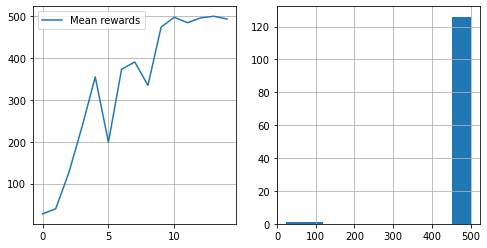

3.485602855682373


In [21]:
algorithm = <>

for i in range(15):
    t = time.time()
    algorithm.step(model)
    print(time.time() - t)

500.0

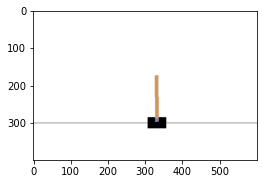

In [15]:
display_session(tmp_env, model, t_max=500)

#### Task 3: Implement and compare the parallelized version of the algorithm

In [22]:
model = <>

last mean reward = 353.210


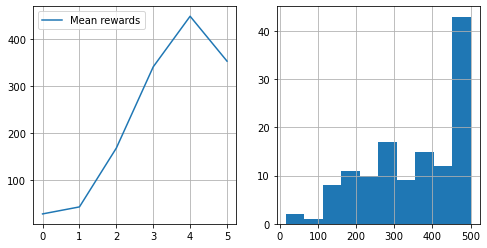

26.267060041427612


In [ ]:
algorithm = <>

for i in range(15):
    t = time.time()
    algorithm.step(model)
    print(time.time() - t)

### Environment 2: LunarLanderContinuous-v2

last mean reward = 155.350


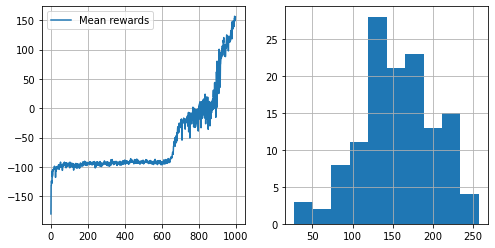

In [16]:
def get_env_function():
    env = gym.make('LunarLanderContinuous-v2').env
    return env
tmp_env = get_env_function()
n_states = tmp_env.observation_space.shape[0]
n_actions = tmp_env.action_space.shape[0]
model = <>
algorithm = <>
for i in range(1000):
    algorithm.step(model)

297.1928817226966

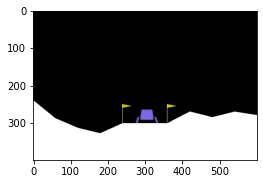

In [17]:
display_session(tmp_env, model, t_max=500)

### Task 3: Hyperparameter's analysis

Now we are going to do some experimental analysis of the algorithm.

Plan:
- to learn something about the *std* parameter
- to learn something about the *learning rate* parameter
- to learn something about the *n_samples* parameter